In [31]:
### importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
## loading the dataframe

df = pd.read_csv('datasets/economic_index.csv')

df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [33]:
## drop columns

df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1,inplace=True)
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [34]:
## check null values

df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

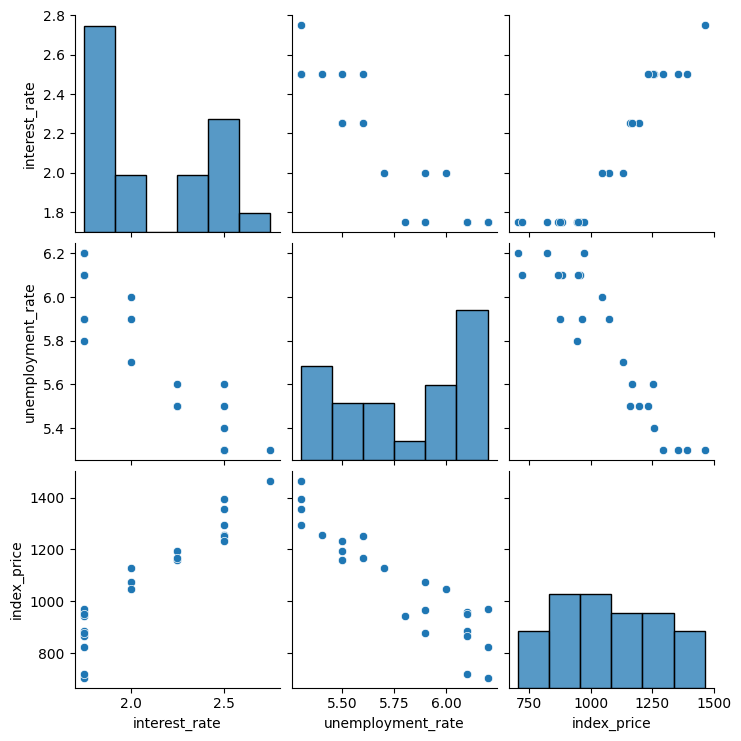

In [35]:
## pairplot

import seaborn as sns

sns.pairplot(df)

In [36]:
### correlation

df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

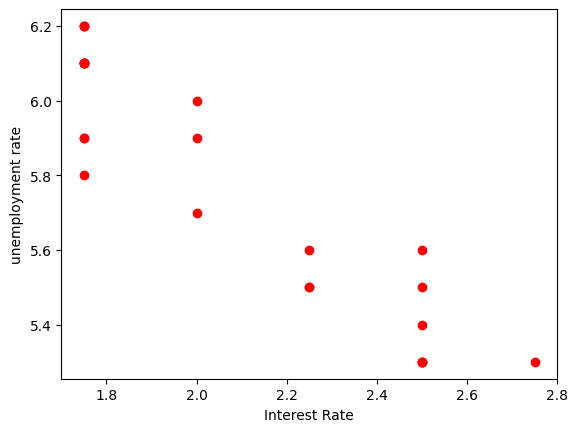

In [37]:
## scatter plots

plt.scatter(df['interest_rate'],df['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('unemployment rate')

In [38]:
## independent and dependent features

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(f"shape of X: {X.shape}, shape of y: {y.shape}")

shape of X: (24, 2), shape of y: (24,)


In [39]:
## train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=22)

print(f'X train shape: {X_train.shape},\nX test shape: {X_test.shape},\ny train shape: {y_train.shape},\ny test shape: {y_test.shape}')

X train shape: (18, 2),
X test shape: (6, 2),
y train shape: (18,),
y test shape: (6,)


<Axes: xlabel='interest_rate', ylabel='index_price'>

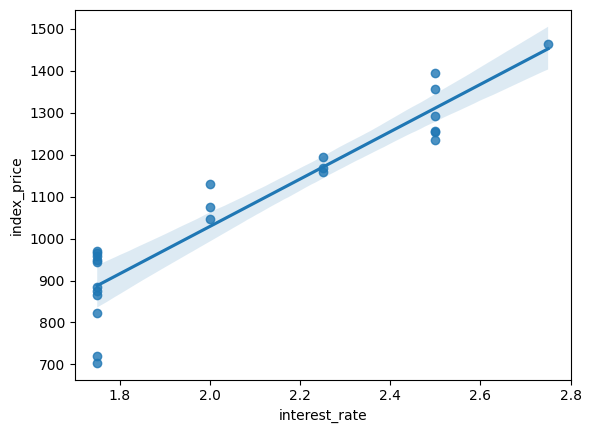

In [40]:
### regression plot

sns.regplot(x='interest_rate',y='index_price',data=df)

In [41]:
## standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
## cross validation

from sklearn.model_selection import cross_val_score
val_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error')
print("Cross Validation score: \n",val_score)
print("mean validation score: \n",np.mean(val_score))

Cross Validation score: 
 [-10369.1983467   -9662.2493883   -5054.44001942 -11724.55193746
  -3381.739641  ]
mean validation score: 
 -8038.43586657541


In [44]:
## prediction

preds = model.predict(X_test)

### Performance metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print(f'Mean squared error: {mse}, \nMean Absolute Error: {mae},\nRoot Mean Squared Error: {rmse},\nR2: {r2}')

adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"Adjusted R2 score: {adj_r2}")

Mean squared error: 1659.7946179918054, 
Mean Absolute Error: 30.23923360249326,
Root Mean Squared Error: 40.74057704539548,
R2: 0.9367871207416953
Adjusted R2 score: 0.8946452012361589


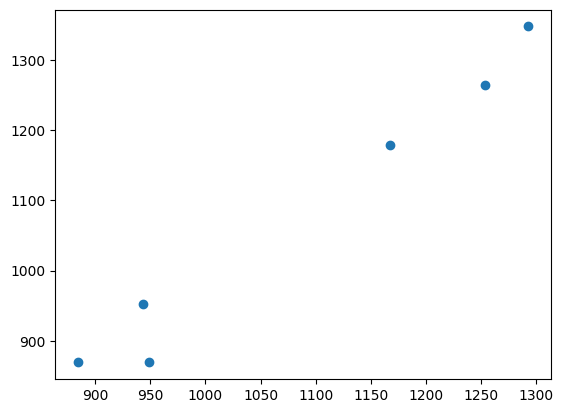

In [45]:
### Assumptions

## 1. linear relationship between y test and y preds
plt.scatter(y_test,preds)

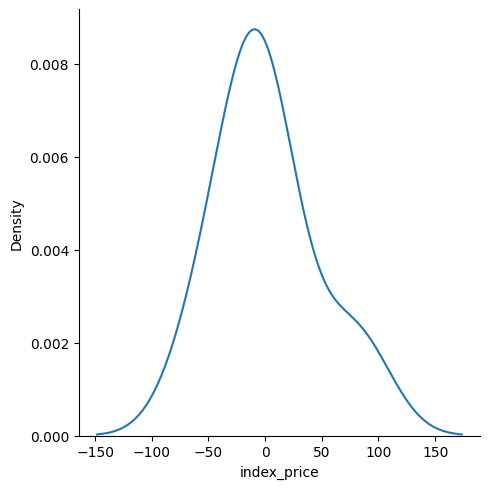

In [46]:
## 2. residuals follows normal distribution

residuals = y_test - preds
sns.displot(residuals, kind='kde')

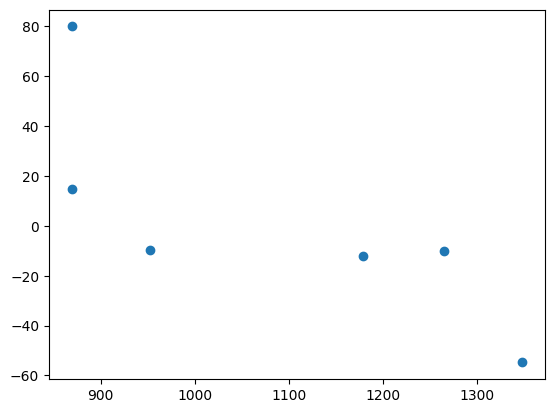

In [47]:
## 3. it should follow uniform distribution

plt.scatter(preds, residuals)

In [48]:
### OLS

import statsmodels.api as sm 
model_ols = sm.OLS(y_train,X_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):             -0.085
Method:                 Least Squares   F-statistic:                             0.2984
Date:                Fri, 10 Oct 2025   Prob (F-statistic):                       0.746
Time:                        17:26:08   Log-Likelihood:                         -151.08
No. Observations:                  18   AIC:                                      306.2
Df Residuals:                      16   BIC:                                      307.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           116.3340    783.165      0.149      0.884   -1543.901    1776.569
x2           -93.1811    783.165     -0.119      0.907   -1753.416    1567.054
==============================================================================
Omnibus:                        0.697   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.610
Skew:                          -0.391   Prob(JB):                        0.737
Kurtosis:                       2.549   Cond. No.                         5.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(f"slope: {model.coef_}, intercept: {model.intercept_}")

slope: [116.3339522 -93.1811402], intercept: 1066.222222222222
